### 1.Import Library

In [2]:
import pandas as pd
import json
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


### 2.Evaluation Precision, Recall, F1-score, Accuracy, Exact Match.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(metrics_dict):
    metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=["Metric", "Score"])

    plt.figure(figsize=(8, 5))
    sns.barplot(data=metrics_df, x="Metric", y="Score", palette="mako")

    for index, row in metrics_df.iterrows():
        plt.text(index, row["Score"] + 0.01, f"{row['Score']:.2%}", ha='center', va='bottom', fontsize=11)

    plt.title("Entity Extraction From Query Evaluation Metrics", fontsize=14, fontweight='bold')
    plt.ylim(0, 1.1)
    plt.ylabel("Score")
    plt.xlabel("")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine()
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import json
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_entities(pred_entities, true_entities, all_keys):
    y_true = []
    y_pred = []

    for key in all_keys:
        y_true.append(key in true_entities and bool(true_entities[key]))
        y_pred.append(key in pred_entities and bool(pred_entities[key]))

    return y_true, y_pred

def compute_exact_match(pred_entities, true_entities):
    return pred_entities == true_entities

def load_and_evaluate(file_path):
    df = pd.read_excel(file_path, engine="openpyxl")

    all_keys = set()
    for val in df["entities_label"]:
        try:
            entity_dict = json.loads(val)
            all_keys.update(entity_dict.keys())
        except:
            pass

    all_y_true = []
    all_y_pred = []
    exact_matches = []

    for idx, row in df.iterrows():
        try:
            pred_dict = json.loads(row["predict_entities"])
        except:
            pred_dict = {}

        try:
            label_dict = json.loads(row["entities_label"])
        except:
            label_dict = {}

        y_true, y_pred = evaluate_entities(pred_dict, label_dict, all_keys)
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

        exact_matches.append(compute_exact_match(pred_dict, label_dict))

    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)
    accuracy = accuracy_score(all_y_true, all_y_pred)
    exact_match_score = sum(exact_matches) / len(exact_matches)

    metrics = {
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Accuracy": accuracy,
        "Exact Match": exact_match_score
    }

    plot_metrics(metrics)




C:\Users\hdang\AppData\Local\Temp\ipykernel_13880\3338064424.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Metric", y="Score", palette="mako")


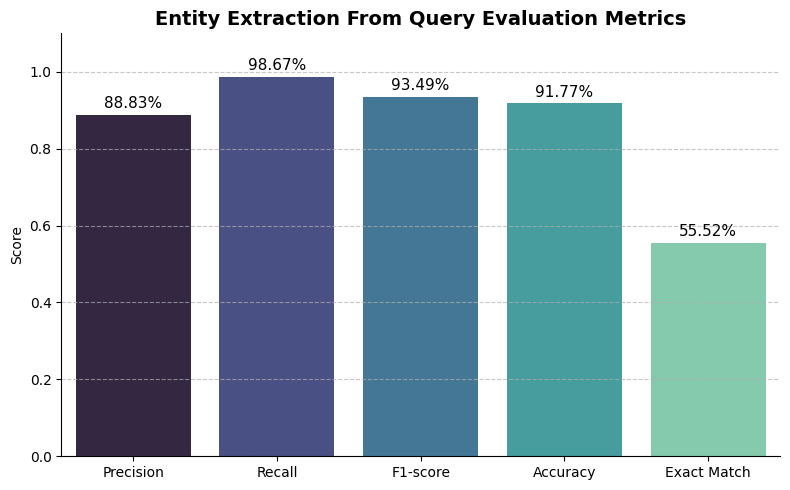

In [4]:
# Gọi hàm đánh giá
file_path = "../data_danhgia_module_router_generate/eval_entities_extract.xlsx"
load_and_evaluate(file_path)